In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import image_dataset_from_directory

2025-10-25 21:53:09.289649: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-25 21:53:09.290150: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-25 21:53:09.359671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-25 21:53:10.832902: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

# Data Processing


In [63]:
training_set=image_dataset_from_directory(
    "/home/saurav-neupane/Downloads/archive (1)/Dataset - train+val+test/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [64]:
validation_set=image_dataset_from_directory(
    "/home/saurav-neupane/Downloads/archive (1)/Dataset - train+val+test/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [65]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

# Model Training

In [66]:
INPUT_SHAPE=[224,224,3]

In [67]:
mobnet=tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [68]:
model=tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [ ]:
model.add(mobnet)

In [71]:
model.add(tf.keras.layers.Dense(units=4, activation="sigmoid"))

In [ ]:
metrics_list=["accuracy", tf.keras.metrics.F1Score()]

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=metrics_list)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [75]:
training_history=model.fit(x=training_set, validation_data=validation_set, epochs=15)

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2796s 1s/step - accuracy: 0.8793 - f1_score: 0.6691 - loss: 1.1298 - val_accuracy: 0.8948 - val_f1_score: 0.6897 - val_loss: 0.9726
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3552s 1s/step - accuracy: 0.8975 - f1_score: 0.6946 - loss: 0.8550 - val_accuracy: 0.8592 - val_f1_score: 0.6743 - val_loss: 0.7564
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2534s 1s/step - accuracy: 0.8974 - f1_score: 0.6975 - loss: 0.6506 - val_accuracy: 0.9032 - val_f1_score: 0.7020 - val_loss: 0.5687
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2655s 1s/step - accuracy: 0.9312 - f1_score: 0.8529 - loss: 0.5021 - val_accuracy: 0.9571 - val_f1_score: 0.9262 - val_loss: 0.4464
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2609s 1s/step - accuracy: 0.9628 - f1_score: 0.9350 - loss: 0.3911 - val_accuracy: 0.9573 - val_f1_score: 0.9284 - val_loss: 0.3551
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2579s 1s/step - accuracy: 0.9659 - f1_score: 0.9410 - loss: 0.3093 - val_accuracy: 0.954

In [7]:
model.save("./Trained_Eye_disease_model.keras")

NameError: name 'model' is not defined

In [8]:
training_history.history

NameError: name 'training_history' is not defined

In [3]:
# Saving history in pickle file
import pickle
with open("Training_history.pkl","wb") as f:
    pickle.dump(training_history.history, f)

NameError: name 'training_history' is not defined

In [ ]:
from tensorflow import keras
model = keras.models.load_model('Trained_Eye_disease model.keras')

ValueError: File not found: filepath=Trained_Eye_disease model.keras. Please ensure the file is an accessible `.keras` zip file.

In [1]:
import pickle
with open("Training_history.pkl","rb") as f:
    load_history=pickle.load(f)
print(load_history)

2025-10-25 19:06:45.786510: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-25 19:06:45.786807: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-25 19:06:45.821149: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-25 19:06:46.728948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

{'accuracy': [0.8792786002159119, 0.8974841237068176, 0.8973926901817322, 0.9312030076980591, 0.9628177285194397, 0.965941309928894, 0.9704894423484802, 0.9757302403450012, 0.9783702492713928, 0.9812585711479187, 0.9840292930603027, 0.9857805371284485, 0.9877148270606995, 0.9887603521347046, 0.9899888634681702], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.88851017, 0.8332659 , 0.        , 0.9545686 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.902098  , 0.9095326 , 0.        , 0.96692693], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.902496 , 0.9243842, 0.       , 0.9630433], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92499036, 0.93715197, 0.56702965, 0.9826112 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9675752 , 0.9464837 , 0.84205425, 0.983744  ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97143185, 0.9482492 , 0.8599405 ,

2025-10-25 19:06:47.630751: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [2]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

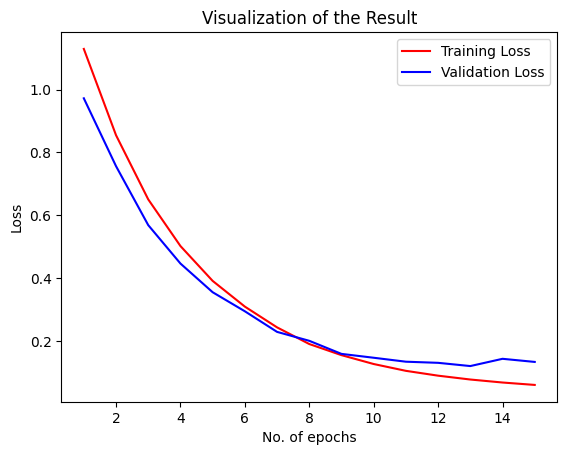

In [5]:
#Loss Visualization

epochs=[i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red', label="Training Loss")
plt.plot(epochs,load_history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Visualization of the Result")
plt.legend()
plt.show()

## Model Evaluation

In [12]:
model=tf.keras.models.load_model("Trained_Eye_disease_model.keras")

/home/saurav-neupane/py_myenv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 178 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

In [24]:
test_set=image_dataset_from_directory(
    "/home/saurav-neupane/Downloads/archive (1)/Dataset - train+val+test/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [25]:
test_loss,test_acc,f1_score=model.evaluate(test_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 122s 357ms/step - accuracy: 0.9679 - f1_score: 0.9430 - loss: 0.1407


In [ ]:
test_loss,test_acc,f1_score

(0.1406513899564743,
 0.9678953886032104,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97191757, 0.94858605, 0.8653732 , 0.9861875 ], dtype=float32)>)

In [27]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
y_true=tf.argmax(true_categories,axis=1)

In [28]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(10933, 4), dtype=float32)>

In [29]:
y_true


<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

In [30]:
#Computing Predicted Label using test_set
predicted_categories=model.predict(test_set)
predicted_categories

342/342 ━━━━━━━━━━━━━━━━━━━━ 114s 333ms/step


array([[0.9462197 , 0.07407549, 0.1188051 , 0.07960914],
       [0.9462197 , 0.07407549, 0.1188051 , 0.07960914],
       [0.9462197 , 0.07407549, 0.1188051 , 0.07960914],
       ...,
       [0.05445269, 0.07236503, 0.09861156, 0.9517381 ],
       [0.05445241, 0.07236501, 0.09861039, 0.95173883],
       [0.05445241, 0.07236501, 0.09861039, 0.95173883]],
      shape=(10933, 4), dtype=float32)

In [33]:
y_pred=tf.argmax(predicted_categories, axis=1)
y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

# 1. Classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3746
           1       0.94      0.95      0.95      1161
           2       0.90      0.83      0.87       887
           3       0.98      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.95      0.94      0.94     10933
weighted avg       0.97      0.97      0.97     10933



# 2. Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
cm

array([[3634,   36,   64,   12],
       [  18, 1107,    3,   33],
       [  78,    9,  736,   64],
       [   2,   21,   11, 5105]])

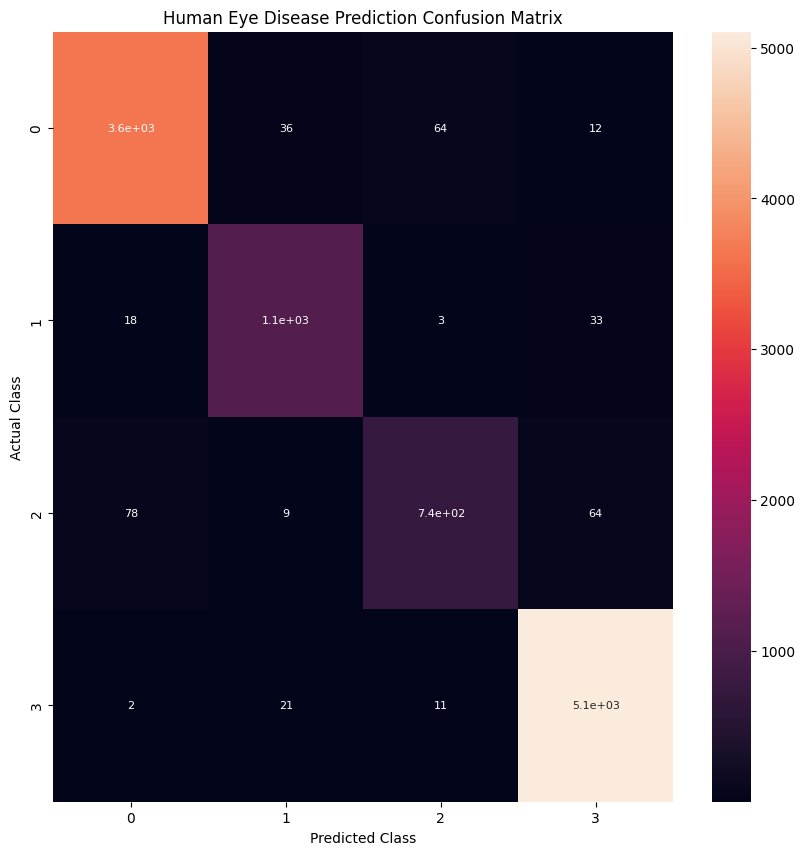

In [36]:
# Visualization using seaborn
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={"size":8})
plt.xlabel("Predicted Class", fontsize=10)
plt.ylabel("Actual Class", fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix", fontsize=12)
plt.show()